In [2]:
import csv
row_list=[["Age","Experience","Rank","Nationality","Go"],
[
36,10,9,"UK","NO"
],
 [
42,12,4,"USA","NO"],
 [
23,4,6,"N","NO"],
 [
52,4,4,"USA","NO"],
 [
43,21,8,"USA","YES"],
 [
44,14,5,"UK","NO"],
 [66,3,7,"N","YES"],
[
35,14,9,"UK","YES"],[
52,13,7,"N","YES"],[
35,5,9,"N","YES"],[
24,3,5,"USA","NO"],[
18,3,7,"UK","YES"],[
45,9,9,"UK","YES"]
    ]
csv.register_dialect('myDialect',
                     delimiter=',',
                     quoting=csv.QUOTE_ALL)
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file, dialect='myDialect')
    writer.writerows(row_list)

# Predict Values

We can use the **Decision Tree** to predict new values.

Example: Should I go see a show starring a 30 years old American comedian, with 10 years of experience, and a comedy ranking of 6?

# How Does it Work?

First, read the dataset with pandas:

In [3]:
import pandas


df = pandas.read_csv("data.csv")

In [4]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


# Now, based on this data set, Python can create a decision tree that can be used to decide if any new shows are worth attending to.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[0]
[1] means 'GO'
[0] means 'NO'


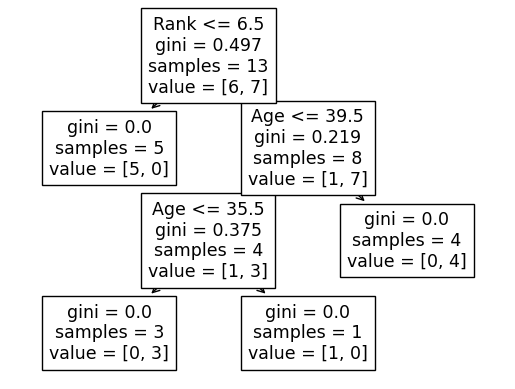

In [10]:
#Three lines to make our compiler able to draw:
import sys
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df = pandas.read_csv("data.csv")
#To make a decision tree, all data has to be numerical.Change string values into numerical values:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']
#X is the feature columns, y is the target column:
X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
#Model training
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

#Two  lines to make our compiler able to draw:

#plt.savefig(sys.stdout.buffer)
sys.stdout.flush()



#Prediction
print(dtree.predict([[30, 10, 6, 1]]))

print("[1] means 'GO'")
print("[0] means 'NO'")

# Prediction

What would the answer be if the comedy rank was 6?

In [8]:
print(dtree.predict([[40, 10, 6, 1]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The above result '[0]' says it's not worth attending the movie of a comedian from USA aged 60years oldacting in movies since 10 years and obtained customer rating of 6

# Different Results

You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.

That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.


# The decision tree uses your earlier decisions to calculate the odds for you to wanting to go see a comedian or not.

# Results explanation

**Rank** <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

***There are many ways to split the samples, we use the GINI method here.***

**gini** = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.


The Gini method uses this formula:

Gini = 1 - (x/n)2 - (y/n)2

Where

 x is the number of positive answers("GO"),

n is the number of samples, and

y is the number of negative answers ("NO"),

 which gives us this calculation:

1 - (7 / 13)2 - (6 / 13)2 = 0.497





**samples** = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.

**value** = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".